## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* label : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from ydata_profiling import ProfileReport

### **나.  학습데이터 불러오기**

In [94]:
train.shape

(3662, 24)

In [103]:
# train = pd.read_csv("train.csv")
print(train["html_num_tags('form')"].value_counts())
print(train["html_num_tags('form')"].median())
print(train["html_num_tags('form')"].mean())
# "url_path_len"는 0으로하거나 평균?
# 'url_domain_len'는 평균이나 중간값
# "url_hostname_len"는 평균이나 중간값
# "html_num_tags('script')"는 0 혹은 1 혹은 2
# " html_num_tags('form')"는 0혹은 1
# "html_num_tags('a')" 0으로하거나 평균?

1.0     1790
0.0     1190
2.0      432
3.0      132
4.0       49
5.0       40
7.0       12
19.0       5
8.0        4
6.0        4
9.0        1
57.0       1
11.0       1
10.0       1
Name: html_num_tags('form'), dtype: int64
1.0
1.0289459311851448


In [102]:
r.corr()

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_ip_present,url_entropy,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('object'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),label
url_num_hyphens_dom,1.000000,-0.097759,0.594840,0.595850,-0.086752,-0.060560,0.002239,-0.123792,0.074715,0.006530,-0.100829,-0.048484,0.050909,-0.037450,0.047483,-0.037264,0.354666
url_path_len,-0.097759,1.000000,-0.124312,-0.124075,0.200456,0.263007,0.015370,-0.033677,0.148698,0.031403,0.002893,-0.014874,0.072815,-0.004283,-0.040979,-0.010509,-0.100681
url_domain_len,0.594840,-0.124312,1.000000,0.998949,0.073277,-0.089883,0.016313,-0.149946,0.161301,-0.007173,-0.104238,-0.028947,0.011323,0.030874,0.028952,-0.037186,0.379331
url_hostname_len,0.595850,-0.124075,0.998949,1.000000,0.069593,-0.091174,0.017373,-0.168319,0.164452,-0.006445,-0.101480,-0.030284,0.011211,0.031223,0.031806,-0.035993,0.383235
url_num_dots,-0.086752,0.200456,0.073277,0.069593,1.000000,0.252406,0.213563,0.185958,0.186808,-0.000986,-0.084627,-0.017047,-0.026251,-0.000408,-0.069857,-0.030861,-0.045959
url_num_underscores,-0.060560,0.263007,-0.089883,-0.091174,0.252406,1.000000,0.238256,-0.048390,0.249632,-0.023698,-0.058170,-0.021364,0.060131,0.029475,-0.074659,-0.004402,-0.128536
url_query_len,0.002239,0.015370,0.016313,0.017373,0.213563,0.238256,1.000000,-0.047256,0.356470,-0.029678,-0.069995,-0.010992,0.000147,0.149048,-0.002471,-0.025316,0.188576
url_ip_present,-0.123792,-0.033677,-0.149946,-0.168319,0.185958,-0.048390,-0.047256,1.000000,-0.159335,-0.025528,-0.083482,0.050901,0.011241,-0.018777,-0.082260,-0.038047,-0.078929
url_entropy,0.074715,0.148698,0.161301,0.164452,0.186808,0.249632,0.356470,-0.159335,1.000000,-0.014719,-0.094406,-0.032257,-0.005384,0.059224,-0.026597,-0.026810,0.165808
html_num_tags('iframe'),0.006530,0.031403,-0.007173,-0.006445,-0.000986,-0.023698,-0.029678,-0.025528,-0.014719,1.000000,0.279571,0.046772,-0.024008,-0.006036,0.123515,0.051646,-0.021871


In [20]:
# profile = train.profile_report(interactions={"targets":{"label"},},explorative=True)
# profile = ProfileReport(train, title="Data Profiling Report")
# profile.to_file(output_file="output.html")
# profile.to_widgets()
# profile.to_notebook_iframe()

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

<Figure size 2000x500 with 0 Axes>

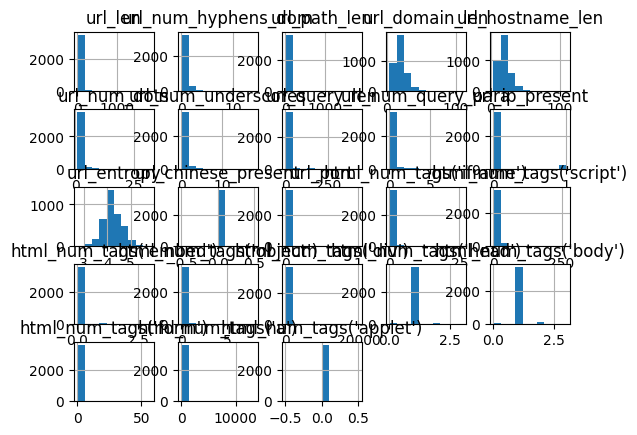

In [21]:
plt.figure(figsize=(20,5))
train.hist()
plt.show()

In [22]:
import numpy as np
train["label"] = np.where(train["label"] == "benign" , 0, 1)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

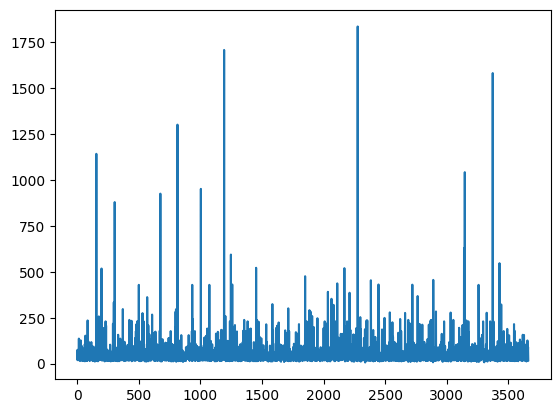

In [24]:
plt.plot(train["url_len"])
plt.show()

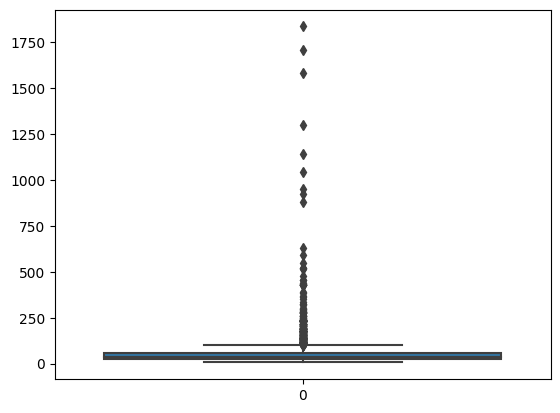

In [25]:
sns.boxplot(train["url_len"])
plt.show()

In [26]:
# train.isnull().sum()
train=train.dropna(axis=0)
train.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

In [27]:
train["url_len"].describe()

count    3662.000000
mean       54.572365
std        82.513738
min         6.000000
25%        24.000000
50%        36.000000
75%        55.000000
max      1837.000000
Name: url_len, dtype: float64

In [28]:
pd.options.display.max_columns = 50
train.describe(include='all')

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
count,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.0,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.000000,3662.0,3662.000000
mean,54.572365,0.412616,29.373839,20.385035,20.327690,2.516658,0.272802,4.710268,0.104315,0.060623,4.228548,0.0,0.002185,0.220918,8.787275,0.018023,0.028946,70.824959,0.998088,1.016658,1.028946,66.185691,0.0,0.493173
std,82.513738,0.846855,78.604482,9.597743,9.626212,1.534319,1.124881,25.324960,0.574461,0.238669,0.393160,0.0,0.046695,0.898613,12.650442,0.144847,0.237746,365.683940,0.145013,0.225392,1.564155,342.742054,0.0,0.500022
min,6.000000,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.737839,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,24.000000,0.000000,1.000000,14.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.983196,0.0,0.000000,0.000000,2.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,2.000000,0.0,0.000000
50%,36.000000,0.000000,13.000000,17.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.189561,0.0,0.000000,0.000000,4.000000,0.000000,0.000000,33.000000,1.000000,1.000000,1.000000,16.000000,0.0,0.000000
75%,55.000000,1.000000,31.000000,24.000000,24.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.459800,0.0,0.000000,0.000000,12.000000,0.000000,0.000000,62.000000,1.000000,1.000000,1.000000,52.000000,0.0,1.000000
max,1837.000000,14.000000,1816.000000,109.000000,109.000000,32.000000,18.000000,429.000000,9.000000,1.000000,5.821782,0.0,1.000000,26.000000,267.000000,3.000000,8.000000,19941.000000,3.000000,3.000000,57.000000,13451.000000,0.0,1.000000


In [29]:
train["label"].value_counts()

0    1856
1    1806
Name: label, dtype: int64

In [30]:
train["html_num_tags('applet')"].value_counts()

0.0    3662
Name: html_num_tags('applet'), dtype: int64

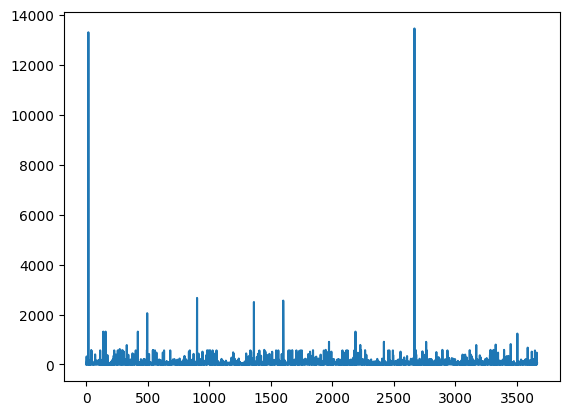

In [31]:
#html_num_tags('a')
train["html_num_tags('a')"].plot()
plt.show()

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [32]:
train.corr()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
url_len,1.000000,-0.022906,0.943060,0.003720,0.004154,0.265969,0.313584,0.325898,0.275220,-0.064344,0.271714,NaN,0.045969,0.019893,-0.031197,-0.010599,-0.021034,-0.015682,0.070790,0.045517,-0.036450,-0.022294,NaN,0.007357
url_num_hyphens_dom,-0.022906,1.000000,-0.097759,0.594840,0.595850,-0.086752,-0.060560,0.002239,-0.002032,-0.123792,0.074715,NaN,-0.022801,0.006530,-0.100829,-0.051734,-0.048484,-0.010954,0.050909,-0.037450,0.047483,-0.037264,NaN,0.354666
url_path_len,0.943060,-0.097759,1.000000,-0.124312,-0.124075,0.200456,0.263007,0.015370,0.014265,-0.033677,0.148698,NaN,0.051573,0.031403,0.002893,-0.002151,-0.014874,-0.010298,0.072815,-0.004283,-0.040979,-0.010509,NaN,-0.100681
url_domain_len,0.003720,0.594840,-0.124312,1.000000,0.998949,0.073277,-0.089883,0.016313,0.016493,-0.149946,0.161301,NaN,-0.003706,-0.007173,-0.104238,-0.011084,-0.028947,-0.002318,0.011323,0.030874,0.028952,-0.037186,NaN,0.379331
url_hostname_len,0.004154,0.595850,-0.124075,0.998949,1.000000,0.069593,-0.091174,0.017373,0.017526,-0.168319,0.164452,NaN,-0.027116,-0.006445,-0.101480,-0.010310,-0.030284,-0.001312,0.011211,0.031223,0.031806,-0.035993,NaN,0.383235
url_num_dots,0.265969,-0.086752,0.200456,0.073277,0.069593,1.000000,0.252406,0.213563,0.182729,0.185958,0.186808,NaN,0.033805,-0.000986,-0.084627,-0.030849,-0.017047,-0.031807,-0.026251,-0.000408,-0.069857,-0.030861,NaN,-0.045959
url_num_underscores,0.313584,-0.060560,0.263007,-0.089883,-0.091174,0.252406,1.000000,0.238256,0.237892,-0.048390,0.249632,NaN,0.082255,-0.023698,-0.058170,-0.028507,-0.021364,-0.018435,0.060131,0.029475,-0.074659,-0.004402,NaN,-0.128536
url_query_len,0.325898,0.002239,0.015370,0.016313,0.017373,0.213563,0.238256,1.000000,0.838149,-0.047256,0.356470,NaN,-0.008704,-0.029678,-0.069995,-0.023149,-0.010992,-0.017870,0.000147,0.149048,-0.002471,-0.025316,NaN,0.188576
url_num_query_para,0.275220,-0.002032,0.014265,0.016493,0.017526,0.182729,0.237892,0.838149,1.000000,-0.046136,0.326089,NaN,-0.008498,-0.032484,-0.068097,-0.022600,-0.016115,-0.016296,-0.017279,0.108933,-0.007009,-0.025142,NaN,0.184108
url_ip_present,-0.064344,-0.123792,-0.033677,-0.149946,-0.168319,0.185958,-0.048390,-0.047256,-0.046136,1.000000,-0.159335,NaN,0.110661,-0.025528,-0.083482,-0.031613,0.050901,-0.033256,0.011241,-0.018777,-0.082260,-0.038047,NaN,-0.078929


In [33]:
train["label"].value_counts()

0    1856
1    1806
Name: label, dtype: int64

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3662 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3662 non-null   float64
 1   url_num_hyphens_dom      3662 non-null   float64
 2   url_path_len             3662 non-null   float64
 3   url_domain_len           3662 non-null   float64
 4   url_hostname_len         3662 non-null   float64
 5   url_num_dots             3662 non-null   float64
 6   url_num_underscores      3662 non-null   float64
 7   url_query_len            3662 non-null   float64
 8   url_num_query_para       3662 non-null   float64
 9   url_ip_present           3662 non-null   float64
 10  url_entropy              3662 non-null   float64
 11  url_chinese_present      3662 non-null   float64
 12  url_port                 3662 non-null   float64
 13  html_num_tags('iframe')  3662 non-null   float64
 14  html_num_tags('script') 

In [82]:
a=["url_num_hyphens_dom","url_domain_len","url_hostname_len","url_num_dots","url_num_underscores","url_entropy","html_num_tags('iframe')","html_num_tags('script')","html_num_tags('object')","html_num_tags('head')","html_num_tags('body')","html_num_tags('form')","html_num_tags('a')"]
# len(a)
# b=["url_len","url_num_hyphens_dom","url_path_len"]
# c=["url_chinese_present","url_ip_present","url_port","label","html_num_tags('applet')"]
# r=train.drop(c,axis=1)
model=sm.Logit(train["label"], train[a])
result=model.fit()
print(result.pvalues)
# for i in list(r):""
#     model=sm.Logit(train["label"], train[i])
#     result=model.fit()
#     print(result.pvalues)
# ["url_len","url_path_len","url_domain_len","url_query_len","url_num_query_para","html_num_tags('embed')","html_num_tags('div')"]

Optimization terminated successfully.
         Current function value: 0.454106
         Iterations 9
url_num_hyphens_dom        5.136575e-22
url_domain_len             4.604236e-05
url_hostname_len           4.590098e-06
url_num_dots               1.108513e-04
url_num_underscores        9.169373e-06
url_entropy                3.397098e-03
html_num_tags('iframe')    3.063225e-06
html_num_tags('script')    3.154119e-20
html_num_tags('object')    6.978534e-05
html_num_tags('head')      4.957946e-05
html_num_tags('body')      1.913395e-05
html_num_tags('form')      8.149026e-53
html_num_tags('a')         1.268890e-57
dtype: float64


In [36]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 3662
Model:                          Logit   Df Residuals:                     3661
Method:                           MLE   Df Model:                            0
Date:                Wed, 08 Mar 2023   Pseudo R-squ.:              -0.0001331
Time:                        10:59:12   Log-Likelihood:                -2538.3
converged:                       True   LL-Null:                       -2538.0
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
url_len    -2.824e-05      0.000     -0.085      0.933      -0.001       0.001


In [37]:
np.exp(result.params)

url_len    0.999972
dtype: float64

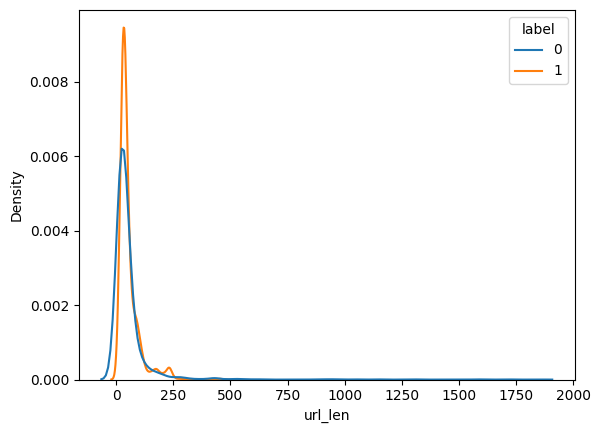

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(x='url_len', data = train, hue ='label')
plt.show()

In [39]:
import scipy.stats as spst
pd.crosstab(train['label'],train['url_ip_present'])
table = pd.crosstab(train['label'],train['url_ip_present'])
spst.chi2_contingency(table)

(22.156848408009076,
 2.5125807608020703e-06,
 1,
 array([[1743.48443474,  112.51556526],
        [1696.51556526,  109.48443474]]))

In [40]:
pd.crosstab(train['label'],train['url_chinese_present'])
table = pd.crosstab(train['label'],train['url_chinese_present'])
spst.chi2_contingency(table)

(0.0,
 1.0,
 0,
 array([[1856.],
        [1806.]]))

In [41]:
train["url_port"].value_counts()

0.0    3654
1.0       8
Name: url_port, dtype: int64

In [42]:
pd.crosstab(train['label'],train['url_port'])
table = pd.crosstab(train['label'],train['url_port'])
spst.chi2_contingency(table)

(0.09941960061587153,
 0.752527250747366,
 1,
 array([[1851.94538504,    4.05461496],
        [1802.05461496,    3.94538504]]))

# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [43]:
# 데이터 프레임의 info를 확인합니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3662 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3662 non-null   float64
 1   url_num_hyphens_dom      3662 non-null   float64
 2   url_path_len             3662 non-null   float64
 3   url_domain_len           3662 non-null   float64
 4   url_hostname_len         3662 non-null   float64
 5   url_num_dots             3662 non-null   float64
 6   url_num_underscores      3662 non-null   float64
 7   url_query_len            3662 non-null   float64
 8   url_num_query_para       3662 non-null   float64
 9   url_ip_present           3662 non-null   float64
 10  url_entropy              3662 non-null   float64
 11  url_chinese_present      3662 non-null   float64
 12  url_port                 3662 non-null   float64
 13  html_num_tags('iframe')  3662 non-null   float64
 14  html_num_tags('script') 

In [44]:
# 중복 데이터 제거를 제거합니다.

In [45]:
# 데이터 프레임의 info를 확인합니다.


---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [46]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


In [47]:
# series.copy() 로 복사하여 새로운 컬럼을 생성합니다.
df_ex["a"]=df_ex["state"].copy().replace(["NY",'CA'],["NewYorrk","California"])
df_ex["a"].unique()

array(['NewYorrk', 'California', 'TX'], dtype=object)

### <span style="color:darkred">[문제3] replace() 함수를 활용하여 'label_binary'의 'benign'은 0으로 'malicious'은 1로 변경해주세요. <br><br> 'label'과 데이터를 비교해 보세요.<span>

In [48]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.






In [49]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인
train["label"].unique()



array([1, 0])

---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제4] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [50]:
# 결축치의 존재를 확인합니다.



In [51]:
# 결측치를 적절히 처리해줍니다.
train=train.dropna(axis=0)
train.isnull().sum()



url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

In [52]:
# 결축치의 존재를 확인합니다.



---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제5] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

In [53]:
## 로지스틱 회귀분석
#["url_len","url_path_len","url_domain_len","url_query_len","url_num_query_para","html_num_tags('embed')","html_num_tags('div')"]
## 다중공선성 (10이상)
#["url_len","url_path_len","url_domain_len","url_hostname_len","url_query_len","url_entropy","html_num_tags('head')","html_num_tags('body')"]
##카이제곱
#["url_chinese_present",'url_port']
#["url_len","url_path_len","url_domain_len","url_chinese_present",'url_port',"url_query_len","url_num_query_para","html_num_tags('embed')","html_num_tags('div')"]
p=["url_len","url_path_len","url_domain_len","url_chinese_present",'url_port',"url_query_len","url_num_query_para","html_num_tags('embed')","html_num_tags('div')","html_num_tags('applet')","label"]
r=train.drop(p,axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(r.values, i) for i in range(r.shape[1])]
vif["features"] = r.columns
vif

,VIF Factor,features
0,2.004479,url_num_hyphens_dom
1,9.210835,url_hostname_len
2,4.421400,url_num_dots
3,1.187165,url_num_underscores
4,1.183600,url_ip_present
5,48.351687,url_entropy
6,1.162426,html_num_tags('iframe')
7,1.750002,html_num_tags('script')
8,1.029701,html_num_tags('object')
9,40.149038,html_num_tags('head')


In [54]:
model=sm.Logit(train["label"], train[list(r)])
result=model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.457803
         Iterations 9
url_num_hyphens_dom        6.857580e-22
url_hostname_len           1.659833e-24
url_num_dots               7.466669e-05
url_num_underscores        9.555471e-06
url_ip_present             2.904533e-01
url_entropy                5.672791e-03
html_num_tags('iframe')    3.377685e-06
html_num_tags('script')    3.551668e-20
html_num_tags('object')    4.919898e-05
html_num_tags('head')      2.022505e-05
html_num_tags('body')      2.715108e-05
html_num_tags('form')      4.621410e-54
html_num_tags('a')         2.322189e-57
dtype: float64


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
c=["label"]
r=train.drop(c,axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(r.values, i) for i in range(r.shape[1])]
vif["features"] = r.columns
vif

c:\Users\dufwn\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
0,10328.410400,url_len
1,2.013335,url_num_hyphens_dom
2,7435.390653,url_path_len
3,4803.449261,url_domain_len
4,4256.113915,url_hostname_len
5,4.634104,url_num_dots
6,1.295607,url_num_underscores
7,709.374957,url_query_len
8,3.521193,url_num_query_para
9,1.433938,url_ip_present


In [81]:
c=["label","url_len","url_domain_len","url_chinese_present","html_num_tags('applet')","url_entropy","html_num_tags('head')"]
r=train.drop(c,axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(r.values, i) for i in range(r.shape[1])]
vif["features"] = r.columns
vif

,VIF Factor,features
0,1.999210,url_num_hyphens_dom
1,1.283862,url_path_len
2,8.211920,url_hostname_len
3,4.318495,url_num_dots
4,1.287092,url_num_underscores
5,3.549019,url_query_len
6,3.494636,url_num_query_para
7,1.204278,url_ip_present
8,1.024942,url_port
9,1.165272,html_num_tags('iframe')


In [92]:
p=["url_len","html_num_tags('applet')","url_chinese_present",'url_port',"html_num_tags('div')","html_num_tags('embed')","url_num_query_para"]
r=train.drop(p,axis=1)
r

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_ip_present,url_entropy,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('object'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),label
0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,4.260333,0.0,7.0,0.0,1.0,1.0,0.0,0.0,1
1,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,4.636107,0.0,18.0,0.0,1.0,1.0,0.0,21.0,0
2,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,3.708966,1.0,33.0,0.0,1.0,1.0,3.0,70.0,0
3,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,4.025592,0.0,15.0,0.0,1.0,1.0,1.0,55.0,0
4,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,4.631833,0.0,10.0,0.0,1.0,1.0,0.0,321.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,1.0,1.0,0.0,3.0,1
3660,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,4.362331,1.0,14.0,0.0,1.0,1.0,3.0,475.0,0
3661,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,4.693343,0.0,13.0,0.0,1.0,1.0,2.0,103.0,1
3662,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,4.604166,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0


---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제6] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [57]:
from sklearn.model_selection import train_test_split
x=r.drop("label",axis=1)
y=r[["label"]]
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=1)

In [58]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((2929, 13), (733, 13), (2929, 1), (733, 1))

In [59]:
train_x.to_csv("train_x.csv")
test_x.to_csv("test_x.csv")
train_y.to_csv("train_y.csv")
test_y.to_csv("test_y.csv")


In [93]:
r.to_csv("r.csv")

In [61]:
from sklearn.decomposition import PCA
pca = PCA()
x1=train.drop("label",axis=1)
x1=x1.drop(p,axis=1)
y1=train[["label"]]
pca.fit(x1)
pca_score = pca.transform(x1)
pca.components_

array([[-9.21463223e-05, -1.01205763e-03, -1.38211108e-04,
        -1.44653204e-05, -2.64981206e-05, -3.07729714e-05,
         1.35502585e-04,  3.57021119e-03,  5.46008937e-05,
         3.87714611e-06, -4.40666880e-06,  4.27600951e-04,
         9.99992998e-01],
       [-1.16054867e-02, -1.72674696e-01, -1.09756129e-02,
        -4.05147320e-03, -1.06399894e-03, -3.47679509e-03,
         1.92664739e-02,  9.84236464e-01, -1.41436048e-04,
         5.39215007e-04,  1.11798599e-04,  2.81423124e-02,
        -3.70613309e-03],
       [ 5.09592951e-02,  9.83394109e-01,  8.00786022e-03,
        -1.24652540e-02, -4.69940245e-03,  5.85371186e-03,
         5.59336176e-03,  1.72644550e-01, -7.51585638e-04,
         3.50269888e-04,  7.82695617e-04,  1.49816252e-02,
         3.77433490e-04],
       [ 7.95109201e-02, -3.89148657e-03, -8.30078687e-01,
        -3.09547633e-01, -2.35743015e-02, -5.08339017e-02,
         5.49446667e-03, -2.35383968e-02,  2.56501326e-03,
         1.34723053e-03,  5.60883712e

In [62]:
pca.explained_variance_

array([1.17473759e+05, 1.60860486e+02, 9.07340972e+01, 2.58149347e+00,
       2.20993817e+00, 1.10359617e+00, 7.39961649e-01, 4.41501420e-01,
       1.38195580e-01, 5.67183598e-02, 5.14244913e-02, 4.86504819e-02,
       1.92897946e-02])

In [63]:
pca.explained_variance_ratio_

array([9.97800227e-01, 1.36631900e-03, 7.70678523e-04, 2.19267247e-05,
       1.87708033e-05, 9.37374030e-06, 6.28509643e-06, 3.75003083e-06,
       1.17380751e-06, 4.81755185e-07, 4.36790051e-07, 4.13228132e-07,
       1.63843922e-07])

In [64]:
pca = PCA(n_components=1)
pc=pca.fit_transform(x1)
pc_y = np.c_[pc,y1]
principalDF = pd.DataFrame(pc_y,columns=["pc1","label"])
principalDF

,pc1,label
0,-66.186574,1.0
1,-45.150037,0.0
2,3.906185,0.0
3,-11.157089,0.0
4,254.809549,0.0
...,...,...
3657,-63.249305,1.0
3658,408.833471,0.0
3659,36.823467,1.0
3660,-63.209711,0.0


In [65]:
principalDF.to_csv("principalDF.csv")